<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [160]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [161]:
data = pd.read_csv('data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [162]:
data.shape

(28332, 24)

In [163]:
df = data.copy()

In [168]:

import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
nlp = spacy.load("en_core_web_lg")



def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON') and (token not in STOPWORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['reviews.text'].apply(get_lemmas)

In [166]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,lemmas
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, miss, backup, s..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[Bulk, expensive, way, product, like]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[Duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, battery, well, price]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[battery, long, last, price, great]"


In [167]:
STOPWORDS = set(STOPWORDS).union(set(['tablet']))

In [70]:
def tokenize(text):
    return([token for token in simple_preprocess(text) if token not in STOPWORDS])

In [71]:
df['tokens'] = df['reviews.text'].apply(lambda x: tokenize(x))
df.tokens.head()


0    [order, item, bad, quality, missing, backup, s...
1               [bulk, expensive, way, products, like]
2                             [duracell, price, happy]
3              [work, brand, batteries, better, price]
4             [batteries, long, lasting, price, great]
Name: tokens, dtype: object

In [72]:
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [73]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,great,8190,9464,1.0,0.030286,0.030286,0.289072
19,batteries,5426,8148,2.0,0.026075,0.056361,0.191515
39,good,5223,5906,3.0,0.018900,0.075260,0.184350
18,price,4931,5221,4.0,0.016708,0.091968,0.174043
96,use,3963,4484,5.0,0.014349,0.106318,0.139877


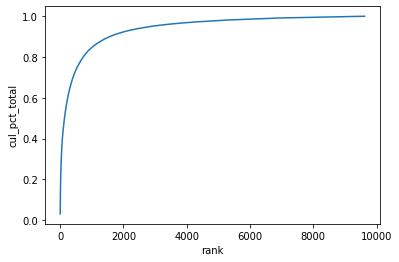

In [74]:
import seaborn as sns


sns.lineplot(x='rank', y='cul_pct_total', data=wc);

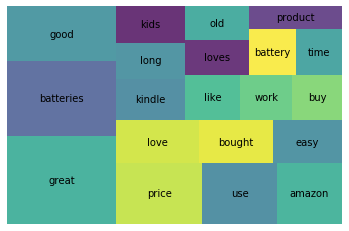

In [75]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [76]:
def doc_stream(data, para):
    data = data[para].values
    for i in data:
        yield i

In [77]:
data_stream = doc_stream(df, 'tokens')

In [78]:
id2word = corpora.Dictionary(data_stream)

In [79]:
id2word.token2id['love']

93

In [80]:
import sys
sys.getsizeof(id2word)

56

In [81]:
len(id2word.keys())

9621

In [82]:
id2word.filter_extremes(no_below=5, no_above=.92)

In [83]:
len(id2word.keys())

3581

In [84]:
corpus = [id2word.doc2bow(text) for text in doc_stream(df,'tokens')]

In [140]:
import warnings
warnings.filterwarnings('ignore')
ida = LdaMulticore(corpus=corpus, id2word=id2word, random_state=723812, num_topics=5, passes=10, workers=8)

In [141]:
ida.print_topics()

[(0,
  '0.042*"great" + 0.020*"screen" + 0.014*"battery" + 0.012*"good" + 0.012*"product" + 0.012*"kindle" + 0.010*"amazon" + 0.010*"works" + 0.009*"nice" + 0.009*"device"'),
 (1,
  '0.035*"loves" + 0.033*"bought" + 0.021*"old" + 0.018*"got" + 0.018*"christmas" + 0.017*"daughter" + 0.017*"gift" + 0.016*"good" + 0.016*"year" + 0.015*"great"'),
 (2,
  '0.081*"batteries" + 0.046*"good" + 0.023*"price" + 0.020*"work" + 0.019*"amazon" + 0.019*"long" + 0.014*"battery" + 0.013*"brand" + 0.013*"great" + 0.012*"buy"'),
 (3,
  '0.030*"use" + 0.027*"love" + 0.027*"easy" + 0.024*"great" + 0.019*"kids" + 0.016*"apps" + 0.016*"games" + 0.015*"books" + 0.014*"bought" + 0.014*"old"'),
 (4,
  '0.071*"great" + 0.059*"price" + 0.024*"kindle" + 0.015*"batteries" + 0.014*"buy" + 0.013*"good" + 0.013*"long" + 0.012*"deal" + 0.011*"like" + 0.010*"better"')]

In [142]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in ida.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
for t in topics: 
    print(t)
    print("\n")

great screen battery good product kindle amazon works nice device


loves bought old got christmas daughter gift good year great


batteries good price work amazon long battery brand great buy


use love easy great kids apps games books bought old


great price kindle batteries buy good long deal like better




In [143]:
scores = [re.findall(r"\d+\.\d+", t[1]) for t in ida.print_topics()]


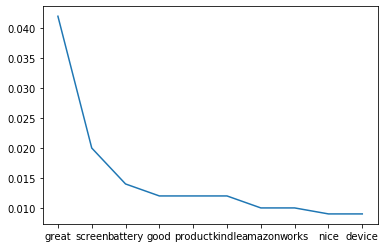

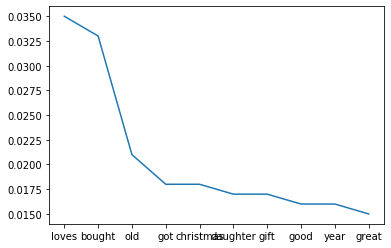

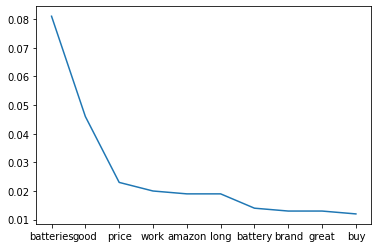

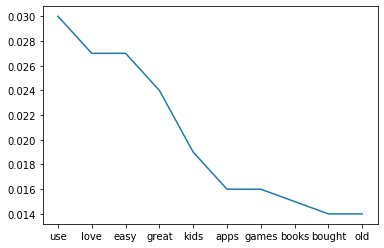

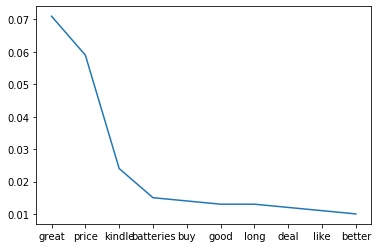

In [144]:
import matplotlib.pyplot as plt

for i in range(len(words)):
    ys = [float(li) for li in scores[i]]
    plt.plot(words[i], ys)
    plt.show()
    

In [145]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(ida, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.156070 -0.053626       1        1  28.284914
2     -0.172490  0.086190       2        1  27.829781
0     -0.016879 -0.105370       3        1  17.482542
4     -0.092206 -0.056590       4        1  13.318208
1      0.125505  0.129396       5        1  13.084555, topic_info=     Category         Freq           Term        Total  loglift  logprob
18    Default  7490.000000      batteries  7490.000000  30.0000  30.0000
17    Default  4996.000000          price  4996.000000  29.0000  29.0000
21    Default  8835.000000          great  8835.000000  28.0000  28.0000
1857  Default  2285.000000          loves  2285.000000  27.0000  27.0000
28    Default  3199.000000         bought  3199.000000  26.0000  26.0000
521   Default  2125.000000            old  2125.000000  25.0000  25.0000
2076  Default  2987.000000         kindle  2987.000000  24.0000  24.0000
1268  Default  1009.000000       daughter  1009.000000  23.0000  23.0000
105   Default  1759.000000           year  1759.000000  22.0000  22.0000
34    Default  6087.000000           good  6087.000000  21.0000  21.0000
31    Default   934.000000      christmas   934.000000  20.0000  20.0000
755   Default  2791.000000           easy  2791.000000  19.0000  19.0000
885   Default  1108.000000           gift  1108.000000  18.0000  18.0000
1679  Default  1658.000000         screen  1658.000000  17.0000  17.0000
23    Default  2362.000000           long  2362.000000  16.0000  16.0000
652   Default  1640.000000          games  1640.000000  15.0000  15.0000
728   Default  1004.000000            son  1004.000000  14.0000  14.0000
101   Default  1287.000000            got  1287.000000  13.0000  13.0000
20    Default  1261.000000          brand  1261.000000  12.0000  12.0000
9     Default  2286.000000           work  2286.000000  11.0000  11.0000
2087  Default  1371.000000          books  1371.000000  10.0000  10.0000
2     Default  2147.000000        battery  2147.000000   9.0000   9.0000
192   Default  2420.000000           kids  2420.000000   8.0000   8.0000
1548  Default  1720.000000           apps  1720.000000   7.0000   7.0000
90    Default  3344.000000           love  3344.000000   6.0000   6.0000
432   Default   787.000000           deal   787.000000   5.0000   5.0000
74    Default   853.000000         brands   853.000000   4.0000   4.0000
1823  Default   518.000000       grandson   518.000000   3.0000   3.0000
409   Default  1107.000000           play  1107.000000   2.0000   2.0000
94    Default  4309.000000            use  4309.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
28     Topic5  1296.670776         bought  3199.028809   1.1307  -3.4131
1490   Topic5    61.814465        brought    84.839767   1.7171  -6.4565
1819   Topic5   103.526482         nephew   159.515503   1.6014  -5.9408
16     Topic5   394.486847          happy   850.188538   1.2659  -4.6031
521    Topic5   815.795837            old  2125.998779   1.0759  -3.8765
105    Topic5   630.215332           year  1759.266479   1.0071  -4.1346
636    Topic5   161.631622       problems   296.685699   1.4264  -5.4953
2856   Topic5   205.735870  granddaughter   414.780792   1.3326  -5.2541
128    Topic5   492.659882      purchased  1378.427124   1.0049  -4.3808
253    Topic5   181.893539       expected   355.117554   1.3647  -5.3772
1804   Topic5   172.748032             yr   336.784973   1.3661  -5.4288
991    Topic5   148.378021     absolutely   283.861786   1.3850  -5.5809
174    Topic5   224.049866          years   556.527222   1.1239  -5.1688
190    Topic5   103.031319          grand   167.176071   1.5497  -5.9456
195    Topic5   356.473907            far  1241.187256   0.7862  -4.7044
141    Topic5   118.826675    replacement   215.375946   1.4390  -5.8030
686    Topic5   152.857193        durable   353.220917   1.1961  -5.5511
19

In [150]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,content,tokens
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",NaN,"[order, item, bad, quality, missing, backup, s..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",NaN,"[bulk, expensive, way, products, like]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",NaN,"[duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",NaN,"[work, brand, batteries, better, price]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",NaN,"[batteries, long, lasting, price, great]"


In [157]:
bad = df[(df['reviews.rating'] == 1) | (df['reviews.rating'] == 2) | (df['reviews.rating'] == 3)]

In [158]:
bad.shape

(2787, 26)

In [159]:
good = df[df['reviews.rating'] == 5]

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling